In [77]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.feature_selection import SelectKBest, SelectPercentile, SelectFromModel, RFE
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression, Ridge, Lasso
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [50]:
properti = pd.read_csv("C:\\Users\\mathe\\Documents\\Semester 5\\Machine Learning\\Dataset UTS.csv")
properti.head(10000)

,squaremeters,numberofrooms,hasyard,haspool,floors,citycode,citypartrange,numprevowners,made,isnewbuilt,hasstormprotector,basement,attic,garage,hasstorageroom,hasguestroom,price,category
0,75523,3,no,yes,63,9373,3,8,2005,old,yes,4313,9005,956,no,7,7559081.50000,Luxury
1,55712,58,no,yes,19,34457,6,8,2021,old,no,2937,8852,135,yes,9,5574642.10000,Middle
2,86929,100,yes,no,11,98155,3,4,2003,new,no,6326,4748,654,no,10,8696869.30000,Luxury
3,51522,3,no,no,61,9047,8,3,2012,new,yes,632,5792,807,yes,5,5154055.20000,Middle
4,96470,74,yes,no,21,92029,4,2,2011,new,yes,5414,1172,716,yes,9,9652258.10000,Luxury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,341,83,no,no,8,1960,4,4,1993,new,yes,2366,4016,229,yes,5,35371.30000,Basic
9996,21514,5,no,yes,11,91373,1,1,1999,old,no,2584,5266,787,no,3,2153602.90000,Basic
9997,1726,89,no,yes,5,73133,7,6,2009,old,yes,9311,1698,218,no,4,176425.90000,Basic
9998,44403,29,yes,yes,12,34606,9,4,1990,old,yes,9061,1742,230,no,0,4448474.00000,Basic


In [51]:
properti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squaremeters       10000 non-null  int64  
 1   numberofrooms      10000 non-null  int64  
 2   hasyard            10000 non-null  object 
 3   haspool            10000 non-null  object 
 4   floors             10000 non-null  int64  
 5   citycode           10000 non-null  int64  
 6   citypartrange      10000 non-null  int64  
 7   numprevowners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isnewbuilt         10000 non-null  object 
 10  hasstormprotector  10000 non-null  object 
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasstorageroom     10000 non-null  object 
 15  hasguestroom       10000 non-null  int64  
 16  price              1000

In [52]:
properti.shape

(10000, 18)

In [53]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

properti.describe()

,squaremeters,numberofrooms,floors,citycode,citypartrange,numprevowners,made,basement,attic,garage,hasguestroom,price
count,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000
mean,49870.13120,50.35840,50.27630,50225.48610,5.51010,5.52170,2005.48850,5033.10390,5028.01060,553.12120,4.99460,4993447.52575
std,28774.37535,28.81670,28.88917,29006.67580,2.87202,2.85667,9.30809,2876.72954,2894.33221,262.05017,3.17641,2877424.10995
min,89.00000,1.00000,1.00000,3.00000,1.00000,1.00000,1990.00000,0.00000,1.00000,100.00000,0.00000,10313.50000
25%,25098.50000,25.00000,25.00000,24693.75000,3.00000,3.00000,1997.00000,2559.75000,2512.00000,327.75000,2.00000,2516401.95000
50%,50105.50000,50.00000,50.00000,50693.00000,5.00000,5.00000,2005.50000,5092.50000,5045.00000,554.00000,5.00000,5016180.30000
75%,74609.75000,75.00000,76.00000,75683.25000,8.00000,8.00000,2014.00000,7511.25000,7540.50000,777.25000,8.00000,7469092.45000
max,99999.00000,100.00000,100.00000,99953.00000,10.00000,10.00000,2021.00000,10000.00000,10000.00000,1000.00000,10.00000,10006771.20000


In [54]:
df_properti = properti.copy()

In [55]:
df_properti.head()

,squaremeters,numberofrooms,hasyard,haspool,floors,citycode,citypartrange,numprevowners,made,isnewbuilt,hasstormprotector,basement,attic,garage,hasstorageroom,hasguestroom,price,category
0,75523,3,no,yes,63,9373,3,8,2005,old,yes,4313,9005,956,no,7,7559081.50000,Luxury
1,55712,58,no,yes,19,34457,6,8,2021,old,no,2937,8852,135,yes,9,5574642.10000,Middle
2,86929,100,yes,no,11,98155,3,4,2003,new,no,6326,4748,654,no,10,8696869.30000,Luxury
3,51522,3,no,no,61,9047,8,3,2012,new,yes,632,5792,807,yes,5,5154055.20000,Middle
4,96470,74,yes,no,21,92029,4,2,2011,new,yes,5414,1172,716,yes,9,9652258.10000,Luxury


In [56]:
df_properti.columns

Index(['squaremeters', 'numberofrooms', 'hasyard', 'haspool', 'floors',
       'citycode', 'citypartrange', 'numprevowners', 'made', 'isnewbuilt',
       'hasstormprotector', 'basement', 'attic', 'garage', 'hasstorageroom',
       'hasguestroom', 'price', 'category'],
      dtype='object')

In [57]:
df_properti["category"].value_counts()

category
Basic     4344
Luxury    3065
Middle    2591
Name: count, dtype: int64

<Axes: xlabel='category', ylabel='count'>

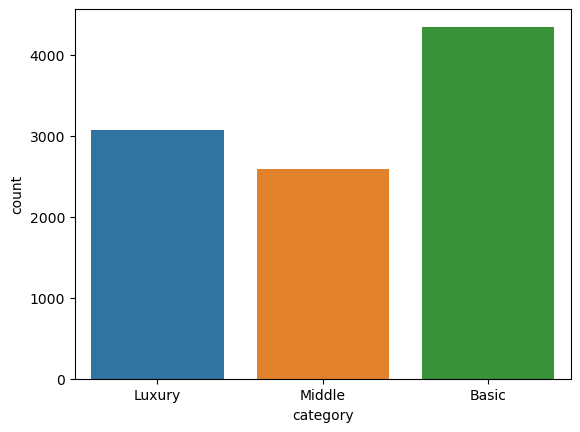

In [58]:
sns.countplot( x = df_properti['category'])

<Axes: ylabel='count'>

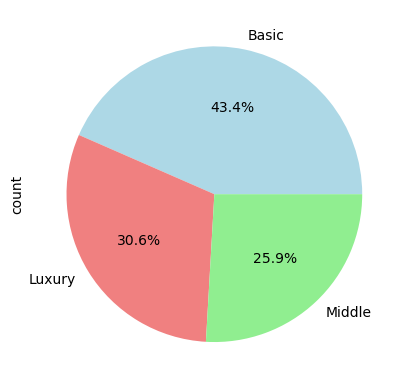

In [59]:
round(df_properti['category'].value_counts()/df_properti.shape[0]*100,2).plot.pie(autopct = '%1.1f%%', colors = ['lightblue', 'lightcoral', 'lightgreen'])

In [78]:
label_encoder = LabelEncoder()
df_properti['category'] = label_encoder.fit_transform(df_properti['category'])

In [79]:
df_properti.head(10000)

,squaremeters,numberofrooms,hasyard,haspool,floors,citycode,citypartrange,numprevowners,made,isnewbuilt,hasstormprotector,basement,attic,garage,hasstorageroom,hasguestroom,price,category
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.50000,1
1,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.10000,2
2,86929,100,1,0,11,98155,3,4,2003,1,0,6326,4748,654,0,10,8696869.30000,1
3,51522,3,0,0,61,9047,8,3,2012,1,1,632,5792,807,1,5,5154055.20000,2
4,96470,74,1,0,21,92029,4,2,2011,1,1,5414,1172,716,1,9,9652258.10000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,341,83,0,0,8,1960,4,4,1993,1,1,2366,4016,229,1,5,35371.30000,0
9996,21514,5,0,1,11,91373,1,1,1999,0,0,2584,5266,787,0,3,2153602.90000,0
9997,1726,89,0,1,5,73133,7,6,2009,0,1,9311,1698,218,0,4,176425.90000,0
9998,44403,29,1,1,12,34606,9,4,1990,0,1,9061,1742,230,0,0,4448474.00000,0


In [83]:
df_properti["category"].value_counts()

category
0    4344
1    3065
2    2591
Name: count, dtype: int64

<Axes: xlabel='category', ylabel='count'>

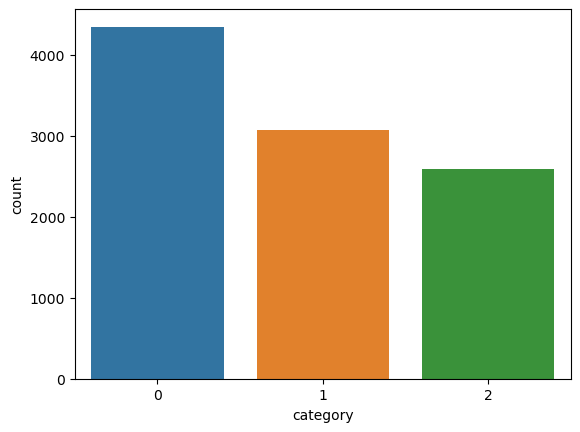

In [84]:
sns.countplot( x = df_properti['category'])

In [85]:
df_properti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squaremeters       10000 non-null  int64  
 1   numberofrooms      10000 non-null  int64  
 2   hasyard            10000 non-null  int64  
 3   haspool            10000 non-null  int64  
 4   floors             10000 non-null  int64  
 5   citycode           10000 non-null  int64  
 6   citypartrange      10000 non-null  int64  
 7   numprevowners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isnewbuilt         10000 non-null  int64  
 10  hasstormprotector  10000 non-null  int64  
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasstorageroom     10000 non-null  int64  
 15  hasguestroom       10000 non-null  int64  
 16  price              1000

In [97]:
print("\n---------------------------------------\n Data Null \n----------------------------------------\n", 
      df_properti.isnull().sum())
print("\n---------------------------------------\n Data Kosong \n----------------------------------------\n", 
      df_properti.empty)
print("\n---------------------------------------\n Data NAN \n----------------------------------------\n", 
      df_properti.isna().sum())


---------------------------------------
 Data Null 
----------------------------------------
 squaremeters         0
numberofrooms        0
hasyard              0
haspool              0
floors               0
citycode             0
citypartrange        0
numprevowners        0
made                 0
isnewbuilt           0
hasstormprotector    0
basement             0
attic                0
garage               0
hasstorageroom       0
hasguestroom         0
price                0
category             0
dtype: int64

---------------------------------------
 Data Kosong 
----------------------------------------
 False

---------------------------------------
 Data NAN 
----------------------------------------
 squaremeters         0
numberofrooms        0
hasyard              0
haspool              0
floors               0
citycode             0
citypartrange        0
numprevowners        0
made                 0
isnewbuilt           0
hasstormprotector    0
basement             0
attic

In [111]:
#pengecekan data duplikat
print("sebelum pengecekan data duplikat", df_properti.shape)
cols_to_check=["squaremeters","numberofrooms","hasyard","haspool","floors","citycode","citypartrange","numprevowners","made","isnewbuilt","hasstormprotector","basement","attic","garage","hasstorageroom","hasguestroom","category"]
df_properti2=df_properti[~df_properti[cols_to_check].duplicated(keep='last')]
print("Sesudah pengecekan data duplikat", df_properti2.shape)

sebelum pengecekan data duplikat (10000, 18)
Sesudah pengecekan data duplikat (10000, 18)


In [109]:
df_properti2 = df_properti.drop('price', axis=1)
df_properti2.head(10)

,squaremeters,numberofrooms,hasyard,haspool,floors,citycode,citypartrange,numprevowners,made,isnewbuilt,hasstormprotector,basement,attic,garage,hasstorageroom,hasguestroom,category
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,1
1,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,2
2,86929,100,1,0,11,98155,3,4,2003,1,0,6326,4748,654,0,10,1
3,51522,3,0,0,61,9047,8,3,2012,1,1,632,5792,807,1,5,2
4,96470,74,1,0,21,92029,4,2,2011,1,1,5414,1172,716,1,9,1
5,79770,3,0,1,69,54812,10,5,2018,0,1,8871,7117,240,0,7,1
6,75985,60,1,0,67,6517,6,9,2009,1,1,4878,281,384,1,5,1
7,64169,88,0,1,6,61711,3,9,2011,1,1,3054,129,726,0,9,2
8,92383,12,0,0,78,71982,3,7,2000,0,0,7507,9056,892,1,1,1
9,95121,46,0,1,3,9382,7,9,1994,0,0,615,1221,328,0,10,1


In [122]:
X=df_properti2.drop(columns=['category'],axis=1)
y=df_properti2.category

X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=81)
print(X_train.shape)
print(X_test.shape)

(8000, 17)
(2000, 17)
